# Directory Instructions: Copy all Training set, Testing set images, csv files to one directory. Also, keep only one column: labels in the csv files and remove other pixel values etc. 
# Add the paths wherever required neatly

# Reference Link: https://medium.com/@devalshah1619/face-recognition-using-eigenfaces-technique-f221d505d4f7

In [176]:
# Import Pillow for reading of Image

import PIL

In [177]:
from PIL import Image

In [178]:
# Check if Pillow works with an example

image = Image.open('01153_00000.ppm')

In [179]:
print(image.format)

PPM


In [180]:
print(image.mode)

RGB


In [181]:
print(image.size)

(100, 100)


In [182]:
image.show()

In [183]:
from matplotlib import image
from matplotlib import pyplot

In [188]:
# imread from the library matplotlib image converts the image into multi-dimensional array

data = image.imread('01153_00000.ppm')

In [189]:
print(data.dtype)

uint8


In [190]:
print(data.shape)

(100, 100, 3)


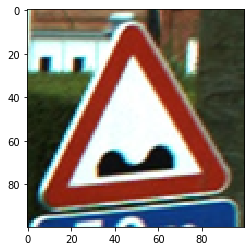

In [191]:
pyplot.imshow(data)

In [193]:
import pandas as pd
# We've taken 2 csv's with the Image labels and edited out other columns consisting of the size
# Because, we need equal sized images for training and testing data, we'll be resizing them later
# Thus, copy all training and testing data in one directory and copy the csv's for train-test separately
df_train = pd.read_csv('GT-00000.csv')
df_test = pd.read_csv('GT-00000t.csv')

In [194]:
df_train['Filename'].values

array(['01153_00000.ppm', '01153_00001.ppm', '01153_00002.ppm',
       '01160_00000.ppm', '01160_00001.ppm', '01160_00002.ppm',
       '01797_00000.ppm', '01797_00001.ppm', '01797_00002.ppm',
       '01798_00000.ppm', '01798_00001.ppm', '01798_00002.ppm',
       '01799_00000.ppm', '01799_00001.ppm', '01799_00002.ppm'],
      dtype=object)

# Training Algorithm

In [195]:
import os
import matplotlib.image as mpimg
import numpy as np
x = []

# Now to import only the images of training data for now, we use the os.walk method
# And filter out the unrequired files in the directory, pick up only the images which have labels in Training dataset

for root, dirs, files in os.walk(".", topdown=False):
    for name in files:
        print(os.path.join(root, name))
        
        if name!= 'Untitled-checkpoint.ipynb' and name!='Untitled.ipynb' and name!='GT-00000.csv' and name!='GT-00000t.csv' and name in df_train['Filename'].values:                      
            ima = Image.open(name) # Read the Image
            ima = ima.resize((100, 100)) # Resize the pixels to standard: 100*100
            ima.save(name) # Save the resized image
            data = mpimg.imread(name) # Read the image as a multi-dimensional array consisting of pixel values.
            x.append(data) # Append it in a list we'd use
np.array(x).shape # Shape should be number of images in Training dataset, 100, 100, 3 

./.ipynb_checkpoints/Untitled-checkpoint.ipynb
./01160_00002.ppm
./01798_00002.ppm
./GT-00000t.csv
./01797_00000.ppm
./01799_00001.ppm
./01153_00002.ppm
./00017_00001.ppm
./00021_00000.ppm
./01797_00002.ppm
./00017_00000.ppm
./01798_00000.ppm
./GT-00000.csv
./01160_00000.ppm
./00021_00001.ppm
./01798_00001.ppm
./01799_00002.ppm
./01153_00001.ppm
./00021_00002.ppm
./01160_00001.ppm
./01797_00001.ppm
./00017_00002.ppm
./Untitled.ipynb
./01799_00000.ppm
./01153_00000.ppm


(15, 100, 100, 3)

In [196]:
import numpy as np
x_data = np.array(x)
x_data.shape

(15, 100, 100, 3)

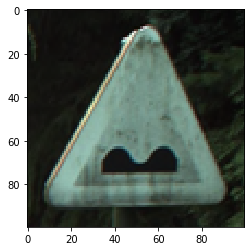

In [197]:
pyplot.imshow(x_data[13])

In [198]:
# Now flatten the multidim arrays into m*n, 1 vectors
tr_data = []
for j in range(len(x_data)):
    tr_data.append(x_data[j].flatten())
t_data = np.array(tr_data)

In [199]:
# Let's calculate average
avg = tr_data[0]
for thing in range(1, len(tr_data)):
    avg += tr_data[thing]
avg

array([184, 140, 176, ...,  77,   5,  44], dtype=uint8)

In [200]:
avg = avg/15
avg

array([12.26666667,  9.33333333, 11.73333333, ...,  5.13333333,
        0.33333333,  2.93333333])

In [201]:
len(avg)

30000

In [202]:
# Now subtract the avg values from the vectors to proceed towards covariance matrix
for j in range(len(tr_data)):
    tr_data[j] = tr_data[j] - avg

In [203]:
t_data = np.array(tr_data)

In [204]:
# Stack together the Vectors
stacked = np.stack(tr_data)

In [205]:
stacked.shape

(15, 30000)

In [206]:
# Perform dot operation between the A and transpose of A giving us a covariance matrix of dimensions 15*15 here
cov_mat = np.dot(stacked, stacked.T)

In [207]:
cov_mat.ndim

2

In [208]:
from numpy import linalg as LA

In [209]:
# Find the Eigen values and Eigen vectors of the covariance matrix we formed
w, v = LA.eig(cov_mat)

In [210]:
v.shape

(15, 15)

In [214]:
# Now, we didn't form the covariance matrix we needed i.e., 30000*30000 dim matrix here
# Because, it takes a lot of time and computational power of the device(Sufficient RAM required)
# Thus, we calculated the dot product of stacked and stacked.T to get us 15*15 matrix easily.
# Now to get our true Covariance matrix that'd lead to Eigenfaces,
# We've to perform dot operation between the Eigenvectors of stacked*stack.T and stacked
# to get Eigenvectors of stacked.T*stacked
vec =  np.dot(v, stacked)
vec.shape

(15, 30000)

In [215]:
vec

array([[  54.54240403,   70.01122089,   39.25272003, ...,   26.30076693,
          52.05618129,   27.05782696],
       [ -44.22461518,  -65.88779541,  -82.29063347, ...,   24.64087178,
          36.65218331,   14.15612243],
       [   3.39388832,   31.99639782,   19.36838577, ...,  -36.48075197,
         -20.07609514,  -21.58884045],
       ...,
       [-145.14744284, -141.25707271, -146.10686405, ...,   -6.28966158,
          -9.55478899,   -8.0124369 ],
       [  48.74612959,   73.42102667,   62.30052545, ...,   14.23959154,
          10.56329612,    1.44127777],
       [-166.43909867, -141.56053174, -132.77795035, ..., -160.77821218,
        -124.54809765,  -90.96573107]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


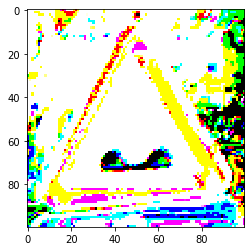

In [218]:
# Let's try if we're close by plotting something. For that, we've to reshape the vectors into (100, 100, 3) 
ve = vec[8].reshape(100, 100, 3)
pyplot.imshow(ve)
ve1 = vec[1].reshape(100, 100, 3)

In [219]:
# Now let's create a temp multidim array of multidim arrays of images' pixel information.
temp = np.zeros(30000*15)
temp = temp.reshape(15, 100, 100, 3)
for h in range(len(vec)):
    temp[h] = vec[h].reshape(100, 100, 3)
    temp[h] = vec[h].reshape(100, 100, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

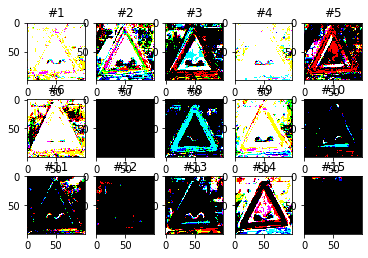

In [220]:
# We can plot multiple images using subplot
import matplotlib.pyplot as plt
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(temp[i], cmap=plt.cm.viridis)
    plt.title('#'+str(i+1))
plt.show()

# Testing Algorithm

In [221]:
# Perform similar reading operation as in Training Algorithm for Testing Algorithm.

x1 = []


for root, dirs, files in os.walk(".", topdown=False):
    for name in files:
        print(os.path.join(root, name))
        
        if name!= 'Untitled-checkpoint.ipynb' and name!='Untitled.ipynb' and name!='GT-00000.csv' and name!='GT-00000t.csv' and name in df_test['Filename'].values:                      
            ima = Image.open(name)
            ima = ima.resize((100, 100))
            ima.save(name)
            data = mpimg.imread(name)
            x1.append(data)
np.array(x1).shape

./.ipynb_checkpoints/Untitled-checkpoint.ipynb
./01160_00002.ppm
./01798_00002.ppm
./GT-00000t.csv
./01797_00000.ppm
./01799_00001.ppm
./01153_00002.ppm
./00017_00001.ppm
./00021_00000.ppm
./01797_00002.ppm
./00017_00000.ppm
./01798_00000.ppm
./GT-00000.csv
./01160_00000.ppm
./00021_00001.ppm
./01798_00001.ppm
./01799_00002.ppm
./01153_00001.ppm
./00021_00002.ppm
./01160_00001.ppm
./01797_00001.ppm
./00017_00002.ppm
./Untitled.ipynb
./01799_00000.ppm
./01153_00000.ppm


(6, 100, 100, 3)

In [222]:
x_test = np.array(x1)

In [223]:
x_test.shape

(6, 100, 100, 3)

In [224]:
# Similar flattening for Test data
tr1_data = []
for j in range(len(x_test)):
    tr1_data.append(x_test[j].flatten())
t1_data = np.array(tr1_data)
t1_data.shape

(6, 30000)

In [225]:
# Computing avg
avg_t = tr1_data[0]
for thing in range(1, len(tr1_data)):
    avg_t += tr1_data[thing]
avg_t= avg_t/6
avg_t

array([ 5.16666667,  4.5       ,  0.        , ...,  7.16666667,
       15.16666667, 41.33333333])

In [227]:
# Computing diff
for j in range(len(tr1_data)):
    tr1_data[j] = tr1_data[j] - avg_t

In [228]:
t1_data = np.array(tr1_data)

In [229]:
t1_data

array([[ 20.66666667,  18.        ,   0.        , ...,  28.66666667,
         60.66666667, 165.33333333],
       [ 42.66666667,  42.        ,  35.        , ...,  96.66666667,
         56.66666667, -24.66666667],
       [ 17.66666667,  36.        ,  56.        , ..., 147.66666667,
        189.66666667, 147.33333333],
       [ 58.66666667,  48.        ,  39.        , ..., 103.66666667,
         52.66666667, -25.66666667],
       [ 52.66666667,  41.        ,  38.        , ..., 108.66666667,
         60.66666667, -26.66666667],
       [ 20.66666667,  28.        ,  46.        , ...,  98.66666667,
        114.66666667,  62.33333333]])

In [230]:
stacked_t = np.stack(tr1_data)

In [232]:
# Perform similar dot mult. in Test Data
cov_mat_t = np.dot(stacked_t, stacked_t.T)

In [233]:
from numpy import linalg as LA

In [259]:
# Again, find the eigen vectors and eigen values
w1, v1 = LA.eig(cov_mat_t)

In [260]:
# Perform dot product betn Eigen vector and the matrix
cov_mat_t1 =  np.dot(v1, stacked_t)
cov_mat_t1.shape

(6, 30000)

In [261]:
vec_t = np.dot(v1, stacked_t)

In [262]:
vec_t

array([[  -5.50613042,  -23.3440245 ,  -48.03543081, ..., -118.64846779,
        -155.30614899,  -99.0800459 ],
       [ -34.6489274 ,  -18.73125168,  -16.13533604, ...,  -36.77374938,
          32.54417793,  135.47384319],
       [ -37.31216557,  -41.04237705,  -55.52847601, ..., -125.70692013,
         -93.72808964,   41.40470428],
       [  71.38031653,   67.00965796,   56.27025019, ...,  159.27586083,
         136.02601368,   88.97920236],
       [  38.39528874,   32.39445459,   19.86932455, ...,   79.97298571,
          65.21367865,   60.47814698],
       [   3.1499533 ,    5.74674419,   15.15604022, ...,   35.57420963,
          75.81350914,  115.96002787]])

In [263]:
# Now let's create a temp multidim array of multidim arrays of images' pixel information.(Use Reshaping)
temp_t = np.zeros(30000*6)
temp_t = temp_t.reshape(6, 100, 100, 3)
for h in range(len(vec_t)):
    temp_t[h] = vec_t[h].reshape(100, 100, 3)
    temp_t[h] = vec_t[h].reshape(100, 100, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


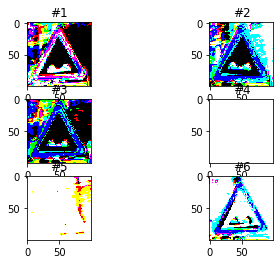

In [264]:
# Plot Test
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(temp_t[i], cmap=plt.cm.viridis)
    plt.title('#'+str(i+1))
plt.show()

In [265]:
# Now let's find the weights of first, the Test eigenvectors
weights_t = np.zeros(6)
for b in range(6):
    img_vec_t = stacked_t[b]
    weights_t[b] = np.dot(temp_t[b].reshape(-1).T, img_vec_t)

In [266]:
stacked_t.shape

(6, 30000)

In [267]:
np.array(weights_t).shape

(6,)

In [268]:
temp_t.shape

(6, 100, 100, 3)

In [269]:
temp_t[0].shape

(100, 100, 3)

In [270]:
temp_t[0].T.shape

(3, 100, 100)

In [271]:
temp_t[0].reshape(-1).shape

(30000,)

In [272]:
weights_t

array([-1.09195017e+07, -1.34675985e+08, -2.84184489e+08,  4.83018408e+08,
        2.67930483e+08,  1.60563655e+08])

In [273]:
# Now let's find the weights of Train eigenvectors
weights = np.zeros(15)
for b in range(15):
    img_vec = stacked[b]
    weights[b] = np.dot(temp[b].reshape(-1).T, img_vec)

In [274]:
weights

array([ 3.26896436e+08,  7.27230944e+07, -2.27921009e+06,  1.72060934e+08,
       -4.59130228e+07,  2.08018548e+08, -7.24882013e+08, -1.89998814e+08,
        4.17216739e+08, -1.65368595e+08, -2.37085773e+08, -2.99934925e+08,
       -1.01542170e+08, -9.02567542e+07, -5.67611141e+08])

In [275]:
weights_t.shape

(6,)

In [276]:
weights.shape

(15,)

In [277]:
errors = []

In [278]:
# Calculating errors between all training and testing images weights
for val in weights:
    for val1 in weights_t:
        errors.append(abs(val-val1))

In [279]:
len(errors)

90

In [280]:
# Finding the indexes of minimum error in training and testing images 
for val in range(len(weights)):
    for val1 in range(len(weights_t)):
        if abs(weights[val]-weights_t[val1])==min(errors):
            index1, index2 = val, val1

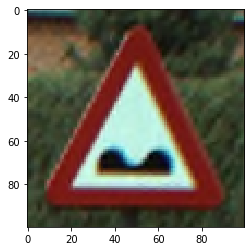

In [281]:
# We've now gotten the perfect Training image
pyplot.imshow(x_data[index1])

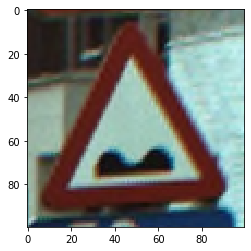

In [283]:
# This is the testing image
pyplot.imshow(x_test[index2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


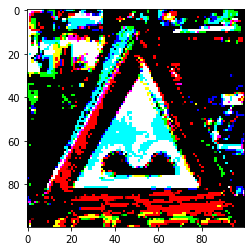

In [285]:
pyplot.imshow(temp[index1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


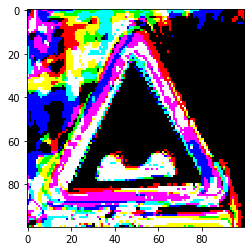

In [287]:
pyplot.imshow(temp_t[index2])